In [2]:
import pandas as pd

In [3]:
log_data_frame = pd.read_csv('dataset/system_logs.csv')
log_data_frame

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert
...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert
2406,1/11/2025 5:32,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert
2408,11/11/2025 11:52,BillingSystem,Email service affected by failed transmission,Critical Error,bert


#### Display all uniques value of source of log messages

In [4]:
log_data_frame.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

#### Displaying all unique labels of log message

In [5]:
log_data_frame.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

### Clustering log messages using DBSCAN and Sentence Transformers (word embedding techniques).



In [6]:
!pip install sentence-transformers scikit-learn

     ---------------------------------------- 0.0/40.9 kB ? eta -:--:--
     ---------------------------- --------- 30.7/40.9 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 40.9/40.9 kB 486.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/470.2 kB ? eta -:--:--
   --------------------------------- ------ 399.4/470.2 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 470.2/470.2 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/515.4 kB ? eta -:--:--
   ------------------------------------- - 501.8/515.4 kB 15.9 MB/s eta 0:00:01
   --------------------------------------- 515.4/515.4 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.7/216.1 MB 23.8 MB/s eta 0:00:10
   ---------------------------------------- 1.4/216.1 MB 17.9 MB/s eta 0:00:13
   ---------------------------------------- 1.4/216.1 MB 17.9 MB/s eta 0:00:1

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

We are using the 'all-MiniLM-L6-v2' model which is good for semantic similarity tasks and clustering

In [8]:
model = SentenceTransformer('all-MiniLM-L6-v2')
log_messages = log_data_frame['log_message'].tolist()
embeddings = model.encode(log_messages)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\abhis\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abhis\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
embeddings[:2]

array([[-1.02939673e-01,  3.35458741e-02, -2.20260676e-02,
         1.55104266e-03, -9.86922532e-03, -1.78956285e-01,
        -6.34410158e-02, -6.01762086e-02,  2.81108543e-02,
         5.99619895e-02, -1.72618385e-02,  1.43369357e-03,
        -1.49560049e-01,  3.15287942e-03, -5.66030405e-02,
         2.71685142e-02, -1.49890827e-02, -3.54037359e-02,
        -3.62936184e-02, -1.45410867e-02, -5.61493495e-03,
         8.75538886e-02,  4.55120392e-02,  2.50963718e-02,
         1.00187194e-02,  1.24266790e-02, -1.39923587e-01,
         7.68696144e-02,  3.14095393e-02, -4.15245071e-03,
         4.36902530e-02,  1.71249788e-02, -8.00950751e-02,
         5.74005730e-02,  1.89092103e-02,  8.55261907e-02,
         3.96399423e-02, -1.34371817e-01, -1.44361309e-03,
         3.06702894e-03,  1.76854089e-01,  4.44887718e-03,
        -1.69274695e-02,  2.24266443e-02, -4.35050502e-02,
         6.09023077e-03, -9.98169743e-03, -6.23972639e-02,
         1.07372375e-02, -6.04898110e-03, -7.14660957e-0

In [11]:
#scaled_embeddings = StandardScaler().fit_transform(embeddings)
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
clusters = dbscan.fit_predict(embeddings)
log_data_frame['cluster'] = clusters
log_data_frame.head()

,timestamp,source,log_message,target_label,complexity,cluster
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,1
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,0


Display cluster statistics and sample messages from each cluster

In [12]:
def display_cluster_samples(df, n_samples=3):
    unique_clusters = df['cluster'].unique()
    for cluster in sorted(unique_clusters):
        cluster_messages = df[df['cluster'] == cluster]['log_message'].sample(
            min(n_samples, len(df[df['cluster'] == cluster])))
        print(f"\nCluster {cluster} (Size: {len(df[df['cluster'] == cluster])})")
        print("Sample messages:")
        for msg in cluster_messages:
            print(f"- {msg}")


display_cluster_samples(log_data_frame)


Cluster -1 (Size: 6)
Sample messages:
- Support for legacy authentication methods will be discontinued after 2025-06-01.
- Customer follow-up process for lead ID 5621 failed due to missing next action
- Lead conversion failed for prospect ID 7842 due to missing contact information.

Cluster 0 (Size: 1194)
Sample messages:
- nova.osapi_compute.wsgi.server [req-048f93d6-3858-482b-972d-48640f16bed1 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" HTTP status code -  200 len: 1893 time: 0.2640278
- nova.metadata.wsgi.server [req-3169ebb5-1055-4017-a172-e8da7500e084 - - - - -] 10.11.21.137,10.11.10.1 "GET /openstack/2012-08-10/meta_data.json HTTP/1.1" Return code: 200 len: 264 time: 0.2397351
- nova.compute.claims [req-2d658d2c-7eff-414e-a68f-3f1c75c9e874 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] [instance: 7e7cc42f-3cb9-4d91-804c-f5a32d54f1c5] Total memory: 

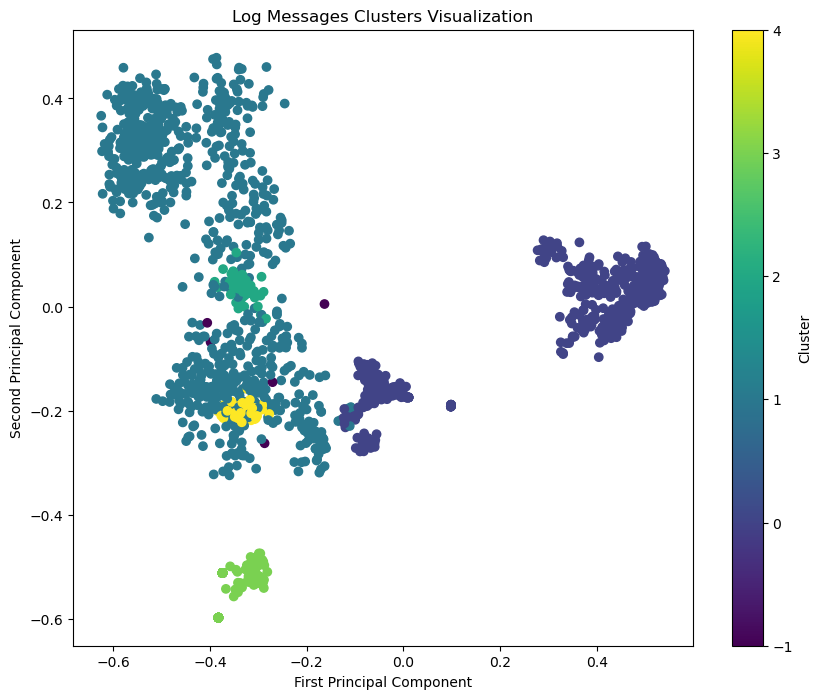

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis')
plt.title('Log Messages Clusters Visualization')
plt.colorbar(label='Cluster')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
